# 深度学习有以下4个步骤：
1.准备数据 2.搭建模型 3.迭代训练 4.使用模型

## 1.准备数据

C:\Users\27781\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


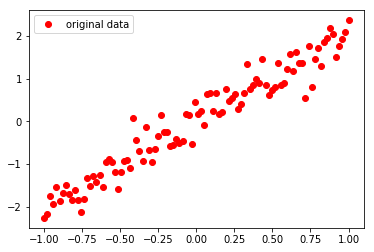

In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

train_X = np.linspace(-1,1,100)
train_Y = 2* train_X + np.random.randn(*train_X.shape)*0.3
plt.plot(train_X,train_Y,'ro',label='original data')
plt.legend()
plt.show()

## 2.搭建模型

In [2]:

X= tf.placeholder('float')
Y= tf.placeholder('float')

#模型参数
W= tf.Variable(tf.random_normal([1]),name='weight')
b= tf.Variable(tf.zeros([1]),name='bias')

#前向结构
z = tf.multiply(X,W)+b

In [3]:
#反向搭建模型 优化
cost = tf.reduce_mean(tf.square(Y-z))#第二个参数axis=None：指定0表示横向求均值或最大值，指定1表示纵向求均值或最大值。
learning_rate=0.01
optimizer= tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## 3.迭代训练：使用模型&训练模型可视化

In [8]:
def moving_average(a,w=10):
    if len(a)<w:
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx , val in enumerate(a)]

epoch: 1 cost: 1.244295 W: [0.3892111] b: [0.5036564]
epoch: 3 cost: 0.18831949 W: [1.5811377] b: [0.18769865]
epoch: 5 cost: 0.0983005 W: [1.904719] b: [0.06590609]
epoch: 7 cost: 0.09141257 W: [1.9886458] b: [0.03373965]
epoch: 9 cost: 0.09074757 W: [2.010351] b: [0.02541104]
epoch: 11 cost: 0.09065035 W: [2.0159633] b: [0.02325728]
epoch: 13 cost: 0.09063022 W: [2.0174143] b: [0.02270045]
epoch: 15 cost: 0.09062533 W: [2.017789] b: [0.02255672]
epoch: 17 cost: 0.0906241 W: [2.0178864] b: [0.0225194]
epoch: 19 cost: 0.09062379 W: [2.0179112] b: [0.02250981]
finished!
cost: 0.090623714 W= [2.017916] b= [0.02250807]


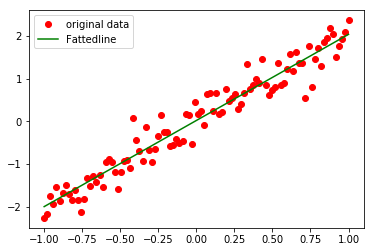

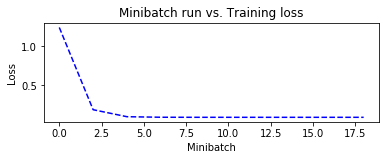

In [39]:
init = tf.global_variables_initializer()

#定义超参数
train_epochs=20
display_step=2

#with tf.Session() as sess:
sess=tf.Session()
sess.run(init)
plotdata={'batchsize':[],'loss':[]}

#向模型输入数据
for epoch in range(train_epochs):
    for (x,y) in zip(train_X,train_Y):
        sess.run(optimizer,feed_dict={X:x,Y:y})

    #根据display_step来展示当前的cost    
    if epoch % display_step==0:
        loss=sess.run(cost, feed_dict={X:train_X,Y:train_Y})
        print('epoch:',epoch+1,'cost:',loss,'W:',sess.run(W),'b:',sess.run(b))
        if not (loss =='NA'):
            plotdata['batchsize'].append(epoch)
            plotdata['loss'].append(loss)

print('finished!')
print('cost:',sess.run(cost,feed_dict={X:train_X,Y:train_Y}),'W=',sess.run(W),'b=',sess.run(b))
#我认为最后的答案不需要再run cost了，直接取plotdata的最后一个loss就好了，不包过W和b则需要，因为没有存。
plt.plot(train_X,train_Y,'ro',label='original data')
plt.plot(train_X,sess.run(W)*train_X+sess.run(b),label='Fattedline',c='green')
plt.legend()
plt.show()

plotdata['avgloss']=moving_average(plotdata['loss'])
plt.figure(1)
plt.subplot(211)
plt.plot(plotdata['batchsize'],plotdata['avgloss'],'b--')
plt.xlabel('Minibatch')
plt.ylabel('Loss')
plt.title('Minibatch run vs. Training loss')    
plt.show()



### 使用模型

In [40]:
print('x=0.2,z=',sess.run(z,feed_dict={X:0.2}))
sess.close()

x=0.2,z= [0.42609128]


### 定义输入节点：
1.通过占位符：X=tf.placeholder('float')
2.通过字典定义： input_dict={'x':tf.placeholder('float'),'y':tf.placeholder('float')}
3.直接定义（使用较少）：train_X=np.float(np.linspace(-1,1,100)),z=tf.multiply(W,train_X)+b
### 定义学习参数的变量：
直接定义和字典定义
W=tf.Variable(tf.random.rand_normal([1]),name='weight')
b=tf.Variable(tf.zeros([1]),name='bias')

para_dict={'w':tf.Variable(tf.random_normal([1]),name="weight', 'b':tf.zeros([1]))}